In [1]:
from functools import partial
from fvhoe.hydro import compute_conservatives
from fvhoe.initial_conditions import square
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 64
p = 0
t = 0.25

solver_x = EulerSolver(
    w0=partial(square, dims="x", vx=1),
    nx=N,
    px=p,
    riemann_solver="advection_upwind",
)
solver_x.rkorder(t, log_every_step=True)

solver_y = EulerSolver(
    w0=partial(square, dims="y", vx=0, vy=1),
    nx=1,
    ny=N,
    px=0,
    py=p,
    riemann_solver="advection_upwind",
)
solver_y.rkorder(t, log_every_step=True)

solver_z = EulerSolver(
    w0=partial(square, dims="z", vx=0, vz=1),
    nx=1,
    nz=N,
    px=0,
    pz=p,
    riemann_solver="advection_upwind",
)
solver_z.rkorder(t, log_every_step=True)

100%|██████████| 0.25/0.25 [00:00]                
100%|██████████| 0.25/0.25 [00:00]                
100%|██████████| 0.25/0.25 [00:00]                


t=0.25, x=0.50, y=[0.01, 0.99], z=0.50
t=0.25, x=0.50, y=0.50, z=[0.01, 0.99]


Text(0, 0.5, '$\\overline{\\rho}$')

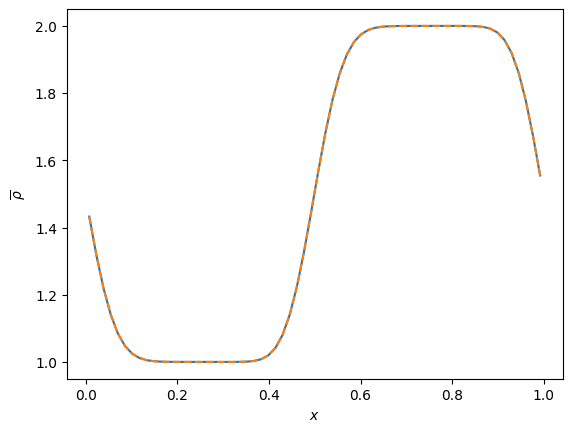

In [3]:
fig, ax = plt.subplots()

param = "rho"
solver_y.plot_1d_slice(ax, t=t, param=param, x=0.5, z=0.5)
solver_z.plot_1d_slice(ax, t=t, param=param, x=0.5, y=0.5, linestyle="--")

ax.set_xlabel("$x$")
ax.set_ylabel(r"$\overline{\rho}$")

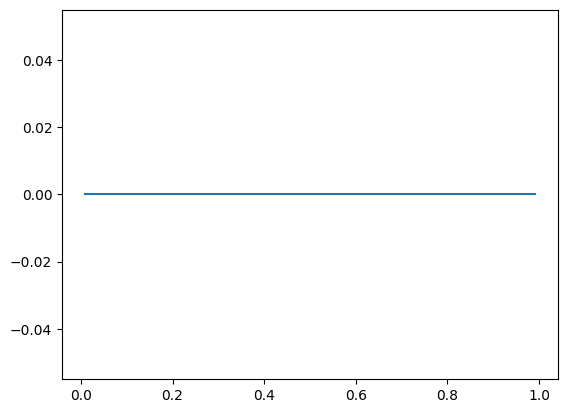

In [4]:
plt.plot(
    solver_x.x,
    solver_x.snapshots[t]["rho"][:, 0, 0] - solver_y.snapshots[t]["rho"][0, :, 0],
)

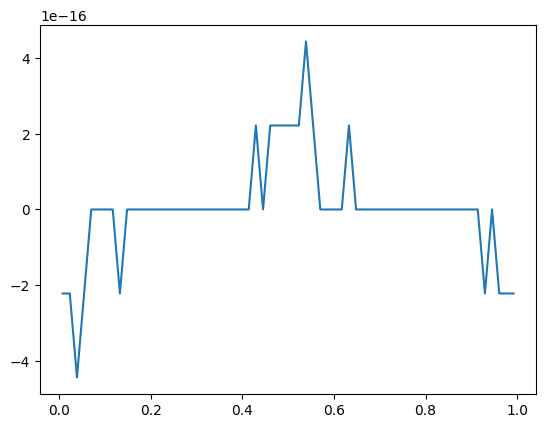

In [5]:
plt.plot(
    solver_y.y,
    solver_y.snapshots[t]["rho"][0, :, 0] - solver_z.snapshots[t]["rho"][0, 0, :],
)